<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> Regresión Logística con Python</font></h1>

Aquí aprenderás Regresión Logística, para luego, crear un modelo basado en datos de telecomunicaciones para predecir cuándo los clientes buscarán otro competidor de forma tal de poder tomar alguna decisión para retenerlos.


<a id="ref1"></a>
## ¿Cuál es la diferencia entre Regresión Logística y Regresión Lineal?

Mientras la Regresión Lineal es para estimar valores continuos (ej. estimar precios de casas), no es la mejor herramienta para predecir la clase de un punto de datos observados. Para estimar la clase de punto de datos, necesitaremos una guía de lo que sería la **clase más probable** para ese punto de datos. Por esto, utilizamos **Regresión Logística**.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Regresión Lineal:</strong></font>
<br>
<br>
Como sabes, la <b>Regresión lineal</b> encuentra una función que relaciona una variable continua dependiente, <b>y</b> , con algunos predictores (variables independientes <b>x1</b>, <b>x2</b>, etc.). Por ejemplo, la regresión lineal Simple asume una función de la forma:
<br><br>
$$
y = 𝜃0 + 𝜃1 * x1 + 𝜃2 * x2 +...
$$
<br>
y encuentra los valores de los parámetros <b>θ0</b>, <b>θ1</b>, <b>𝜃2</b>, etc, donde el término <b>𝜃0</b> es "intersección". Generalmente se muestra como:
<br><br>
$$
ℎ_θ(𝑥) = 𝜃^TX
$$
<p></p>

</div>

La Regresion Logística es una variación de una Regresión Lineal, útil cuando la variable dependiente observada, _y_, es categórica. Produce una fórmula que predice la probabilidad de la clase etiqueta como una función de las variables independientes.

La regresión logística es una curva especial en forma de s a partir de tomar la regresión lineal y transformar la estimación numérica en una probabilidad con la siguiente función, llamada sigmoide 𝜎:

$$
ℎ_θ(𝑥) = 𝜎({θ^TX}) =  \frac {e^{(θ0 + θ1 * x1 + θ2 * x2 +...)}}{1 + e^{(θ0 + θ1 * x1 + θ2 * x2 +...)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = 𝜎({θ^TX}) = \frac{e^{θ^TX}}{1+e^{θ^TX}} 
$$

En esta ecuación, ${θ^TX}$ es el resultado de la regresión (la suma de las variables ponderadas por los coeficientes), `exp` es la función exponencial y $𝜎(θ^TX)$ es la función sigmoide ó [función logística](http://en.wikipedia.org/wiki/Logistic_function), también llamada curva logística. Tiene una forma de "S" (curva sigmoide).

En resumen, la Regresión Logística pasa la entrada a través de las funciones logística/sigmoide pero en realidad termina tratando al resultado como una probabilidad:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width = "400" align = "center">


El objetivo del algoritmo de __Regresión Logística__, es encontrar los mejores parámetros θ, para ℎ_θ(𝑥) = 𝜎({θ^TX}), de forma tal de que el modelo prediga lo mejor posible la clase de cada caso.

### Cliente churn con Regresión Logística
Una compañía de telecomunicaciones está preocupada por el número de clientes que dejan sus líneas fijas de negocio por las de competidores de cable. Ellos necesitan entender quién se está yendo. Imagina que eres un analista en esta compañía y que tienes que descubrir quién es el cliente que se va y por qué

Primero, importemos las librerías necesarias:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### Acerca del set de datos
Utilizaremos datos de las telecomunicaciones para poder predecir el cliente churn. Estos son datos históricos de clientes donde cada fila representa un cliente. Los datos son fáciles de comprender, y podrás descubrir conclusiones que puedes usar de inmediato. Generalmente, es menos caro mantener clientes que conseguir nuevos, así que el foco de este análisis es predecir los clientes que se quedarían en la compañía. 


Estos datos proveen información que ayudarán a predecir comportamientos que retendrán a los clientes. Puedes analizar toda la información relevante del cliente y desarrollar programas de retención centrados en los clientes.



Los datos incluyen información acerca de:

- Clientes que se fueron el último mes – la columna se llama Churn
- Los servicios que cada cliente ha contratado – teléfono, líneas múltiples, internet, seguridad online, resguardo online, protección de dispositivos, soporte técnico y streaming de TV y películas
- Información de la cuenta del cliente - cuánto hace que es cliente, contrato, método de pago, facturación digital, cargos mensuales y cargos totales
- Información demográfica de los clientes – sexo, rango de edad y si tienen pareja y dependientes


###  Cargar los datos Churn de la Telco 
Telco Churn es un archivo de datos ficticio que trata sobre los esfuerzos de una compañía de telecomunicaciones para reducir la huída de sus clientes. Cada caso corresponde a un cliente y se guarda información demográfica e información referente al uso del servicio. Antes de trabajar con los datos, debes utilizar la URL para obtener el archivo ChurnData.csv.

Para descargarlo, utilizaremos `!wget` desde IBM Object Storage.

In [ ]:
#Hacer click aquí y presionar Shift+Enter
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

__¿Sabías?__ Cuando se trata de Machine Learning, seguro trabajarás con grandes datasets (juego de datos). Entonces, ¿dónde podrás guardar esos datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)

### Cargar los Datos desde el Archivo CSV 

In [2]:
churn_df = pd.read_csv(r"..\ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
churn_df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

## Selección y pre-procesamiento de datos

Seleccionemos algunas características para el modelado. También cambiemos el tipo de dato del objetivo (target) para que sea un número entero (integer), ya que es un requerimiento del algoritmo skitlearn:

In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Práctica
¿Cuántas filas y columnas en total hay en este set de datos? ¿Cual es el nombre de las columnas?

In [5]:
# escribí tu código aquí
print('churn_df.shape', churn_df.shape)
churn_df['churn'].value_counts()

churn_df.shape (200, 10)


0    142
1     58
Name: churn, dtype: int64

Definamos X, e y para nuestro set de datos:

In [6]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [7]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

También, normalicemos el set de datos:

In [8]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Entrenar/Probar el set de datos

Ahora, dividamos nuestro set de datos en dos sets, entrenamiento y prueba:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


# Modelando (Regresión Logística con Scikit-learn)

Construyamos nuestro modelo utilizando __LogisticRegression__ con el package Scikit-learn. Esta función implementa regresión logística y puede usar distintos optimizadores numéricos para encontrar parámetros, a saber, ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. Puedes también encontrar más información sobre los pros y contras de estos optimizadores si buscas en internet.

La versión de Regresión Logística en, soporta regularización. Esto es, una técnica que soluciona problemas de sobreajuste en modelos de machine learning.
El parámetro __C__ indica __fuerza de regularización inversa__ la cual debe ser un número flotante positivo. Valores más pequeños indican regularización más fuerte. 
Now lets fit our model with train set:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Ahora, podremos predecir usando nuestro set de prueba:

In [11]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

__predict_proba__  devuelve estimaciones para todas las clases. La primer columna es la probabilidad de la clase 1, P(Y=1|X), y la segunda columna es la probabilidad de la clase 0, P(Y=0|X):

In [12]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

## Evaluación

### índice jaccard
Probemos con el índice jaccard para la evaluación de precisión. Podemos definir como jaccard al tamaño de la intersección dividida por el tamaño de la unión de dos set de etiquetas. Si todo el set de etiquetas de muestra predichas coinciden con el set real de etiquetas, entonces la precisión es 1.0; sino, sería 0.0.



In [13]:
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.375

### Matriz de confusión
Otra forma de mirar la precisión del clasificador es ver la __matriz de confusión__.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función muestra y dibuja la matriz de confusión.
    La normalización se puede aplicar estableciendo el valor `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Matriz de confusión sin normalización
[[ 6  9]
 [ 1 24]]


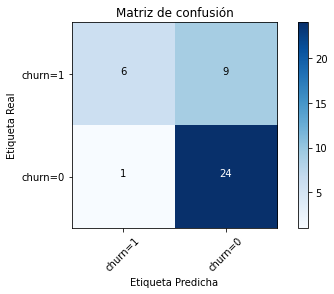

In [16]:
# Calcular la matriz de confusión
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Dibujar la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Matriz de confusión')

Observa la primer fila. Ahí están los clientes cuyo valor churn en el set de prueba es 1.
Como podrás calcular, de 40 clientes, el valor churn de 15 de ellos es 1. 
Y de otros 15, el clasificador predijo que 6 de ellos son 1 y 9 0. 

Quiere decir que, para 6 clientes, el valor actual de churn fue 1 en el set de pruebas y el clasificador los predijo correctamente como 1. Sin embargo, mientras la etiqueta actual de 9 clientes era 1, el clasificador los predijo como 0, lo cual no es muy bueno. Lo podemos considerar como un error del modelo para la primer fila.

¿Qué pasa con los clientes con valor churn 0? Miremos la segunda fila.
Parece que hay 25 clientes con valor churn 0. 


El clasificador predijo correctamente 24 de ellos como 0 y uno de ellos equivocadamente como 1. Así que ha hecho un buen trabajo prediciendo los clientes con churn 0. Una ventaja de la matriz de confusión es que muestra la abilidad del modelo para correctamente predecir o separar las clases. En el caso de clasificador binario, como el ejemplo, podemos entender a estos números como la cantidad de positivos verdaderos, negativos verdaderos y negativos falsos. 

In [17]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Partiendo de la cantidad de cada sección podemos calcular la precisión y el grado(recall) de cada etiqueta:


- __Precision__ es una medida de certeza basada en una etiqueta predicha. Se define de esta forma: precision = TP / (TP + FP)

- __Recall__ es un grado positivo verdadero. Se define de esta forma: Recall =  TP / (TP + FN)

    
Por lo tanto, podemos calcular la precisión y grado de cada clase.

__F1 score:__
Ahora estamos en condiciones de calcular los puntajes F1 para cada etiqueta basada en la precisión y grado de cada etiqueta. 

El puntaje F1 es el promedio armónico de la precisión y grado, donde un grado F1 alcanza su mejor valor en 1 (precisión y grado perfectos) y peor escenario en 0. Es una buena forma de mostrar que un clasificador tiene un buen valor tanto para la precisión como para el grado.


Y finalmente, podemos decir que la exactitud promedio para este clasificador es el promedio del score f1 para ambas etiquetas, cuyo valor es is 0.72 en nuestro caso.

### log loss
Ahora, probemos __log loss__ para la evaluación. En regresión logística, la salida puede ser que la probabilidad de cliente churn sea sí (o su equivalente 1). Esta probabilidad es un valor entre 0 y 1.
Log loss( pérdida logarítmica) mida el rendimiento de un clasificador donde la salida predicha es una probabilidad de valor entre 0 y 1. 


In [18]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101187

## Practice
Intentaremos construir el modelo de Regresión Logística de nuevo para el mismo set de datos, pero esta vez, utilizando valores diferentes de __solucionador__ y __regularización__. ¿Cuál es el nuevo valor de __logLoss__ ?

In [27]:
# escribir tu código aquí
solvers = ("newton-cg", "sag", "lbfgs", "liblinear")
cs = (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1)

for solver in solvers:
    minima = 100000000
    best_c1 = 0
    for c1 in cs:
        LR2 = LogisticRegression(C=c1, solver=solver).fit(X_train,y_train)
        yhat_prob2 = LR2.predict_proba(X_test)
        log_l = log_loss(y_test, yhat_prob2)
        if log_l < minima:
            minima = log_l
            best_c1 = c1 
    print('solver: ', solver)
    print (f"LogLoss {maximun:0.2f}, c1 {best_c1:0.2f}")
    print()


solver:  newton-cg
LogLoss 0.63, c1 0.05

solver:  sag
LogLoss 0.63, c1 0.05

solver:  lbfgs
LogLoss 0.63, c1 0.05

solver:  liblinear
LogLoss 0.63, c1 0.05



Hacer doble click __aquí__ para la solución.

<!-- Tu respuesta está debajo:
    
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

-->

## ¿Deseas aprender más?

IBM SPSS Modeler es una plataforma para analytics que contiene varios algoritmos de machine learning. Fue diseñada para acercar inteligencia predictiva a las decisiones hechas por individuos, grupos, sistemas, toda la empresa. Un free trial está disponible a través de este curso en: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Asi mismo, puedes utilizar Watson Studio para ejecutar estos notebooks más rápido y con datasets más grandes. Watson Studio es una solución en la nube lider de IBM's para científicos de datos, construída por científicos de datos. Con Jupyter notebooks, RStudio, Apache Spark y librerías conocidas pre instaladas en la nube, Watson Studio posibilita a los científicos de datos colaborar en sus proyectos sin tener que instalar nada. Sumate a la comunidad de usuarios Watson Studio hoy mismo por medio de una cuenta gratuita en [Watson Studio](https://cocl.us/ML0101EN_DSX)

### ¡Gracias por completar esta lección!

Laboratorio creado por: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). Este lab y su código fuente fueron registrados bajo los términos de [MIT License](https://bigdatauniversity.com/mit-license/).​